In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
##H2O Gas
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139
deltaH_298=-241.826 #kJ/mol
deltaS_298=188.835 #J/mol
dT=0.001
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [42]:
#H2O liq
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855
deltaH_298=-285.830 #kJ/mol
deltaS_298=69.95 #J/mol
dT=0.001
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

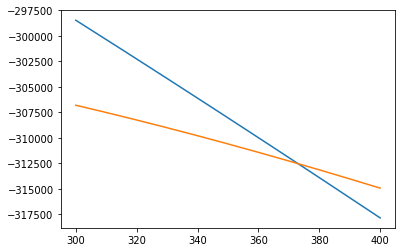

In [43]:
plt.plot(T,deltaG_gas)
plt.plot(T,deltaG_liq)
plt.show()

In [44]:
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp) #calcula el minimo de ese arreglo
np.where(dp==minimo) #en que punto es igual el minimo

(array([73026]),)

In [45]:
T[73026] #se introduce el codigo para verificar el punto minimo

373.02599999827316

In [101]:
import requests 

In [102]:
def LeerArchivo(url):
#url="https://janaf.nist.gov/tables/N-007.txt" #como llamarlo dsde un url
    file=requests.get(url)
    datos=file.text
    datos=datos.split("\n")[3:-1]
    mat=[]
    for x in datos:
        s=x.split("\t")
        mat.append([float(a)for a in s])
    mat=np.array(mat)
    return mat

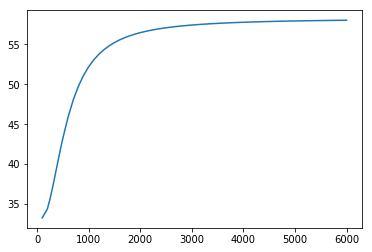

In [103]:
mat=LeerArchivo("https://janaf.nist.gov/tables/N-007.txt")
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

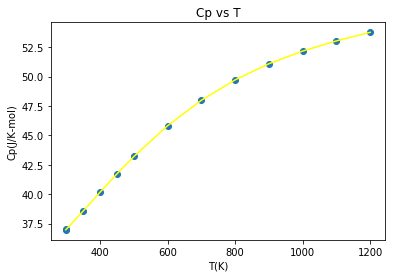

In [104]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)#cuantas filas hay en los datos
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
Cp_calc=X.dot(beta)
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="yellow")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.title("Cp vs T")
plt.show()